# Importing MNIST data 

In [ ]:
#!pip install tensorflow

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_test.shape

(10000, 28, 28)

Recast these sets in matrices of size $(N \times n^2)$

In [ ]:
# Recast training and test sets in matrices of size N x n^2
d = 28**2
x_train = x_train.reshape(-1, d)
x_test = x_test.reshape(-1, d)

In [ ]:
# check dimensions
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# last thing to do, reescale
x_train = x_train / np.max(x_train, axis=1).reshape(-1, 1)
x_test = x_test / np.max(x_test, axis=1).reshape(-1, 1)

In [ ]:
# binarizing the data
x_train[x_train>0]=1
x_train[x_train == 0]=0

x_test[x_test>0]=1
x_test[x_test == 0]=0

# Implementing clustering algorithm based on multinomial mixture model 

In [ ]:
def log_prob_k(x,mu):
  return x@ np.log(mu+1e-10) + (1-x)@np.log(1-mu+1e-10)

def p_x_of_theta(x,pi,mu):
  return p_k @ pi

In [ ]:
np.random.seed(2)
# get number of patterns and their dimension, as well as number of clusters:
P,d = x_train.shape
k = 10 # clusters
# print(P,d,k)

# initialize random mu_jk and pi_k
krange = np.arange(k)
muk = np.random.rand(d,k)
# pik = np.ones(k)/k
pik = np.random.rand(k)
pik = pik/sum(pik)

# algorithm:

runs = 30
counter = 0

for t in range(runs):
  if counter % 5 == 0:
    print('iteration {}'.format(counter))
  counter += 1
  # calculate matrix of probabilities for patterns
  prob_all = log_prob_k(x_train,muk)

  # select k cluster with highest probability
  best_k = np.argmax(prob_all,axis=1)
  # print(np.unique(best_k))

  # initialize arrays for different values:
  N_k = np.zeros(k) # number of patterns in each cluster
  clusters = np.empty((k, 0)).tolist() # matrices of patterns belonging to the cluster
  mujk = np.empty((k, 0)).tolist() # mean value for each dimension for each cluster

  for i in krange:
    N_k[i] = sum(best_k == i)
    
    clusters[i].append(x_train[best_k == i])
    clusters[i] = clusters[i][0]
    
    mujk[i] = np.sum(clusters[i],axis=0)/N_k[i]

# set new pi_k and mu_jk and re-do algorithm
  pik = np.array(N_k/P)
  muk = np.array(mujk).T


# check whether the cluster sizes make sense, break if they dont
  # print(pik)
  if len(np.unique(pik))<9:
    print('one of the clusters got 0 data point assigned, the algorithm crashes.')
    print('please re-run the algorithm, next run will work (or the one after that)')
    break

print('iteration {}'.format(counter))

iteration 0
iteration 5
iteration 10
iteration 15
iteration 20
iteration 25
iteration 30


mean images for all clusters:


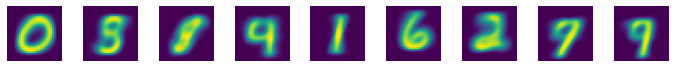

In [ ]:
fig,ax = plt.subplots(1,9,figsize=(12,1))

if counter == runs:
  print('mean images for all clusters:')
  for i in range(k-1):
    ax[i].axis('off')
    ax[i].imshow((muk.T)[i].reshape(28,28))
  plt.show()

# Importing Old Faithful Geyser Data

In [ ]:
import requests
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat' 
page = requests.get(url, verify=False)
data = page.text

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
regexp = re.compile(r'%s'%'\n')
text = regexp.sub(' ',data)
new_text = text[624:].split()

In [ ]:
idxs = np.linspace(0,271,272)*3
text_list = [[float(new_text[int(i)]),float(new_text[int(i+1)]),float(new_text[int(i+2)])] for i in idxs]
text_list = np.array(text_list)

# rescaling data
x_data = text_list[:,1:3]
x_train_ofg = x_data/[max(x_data[:,0]),max(x_data[:,1])]


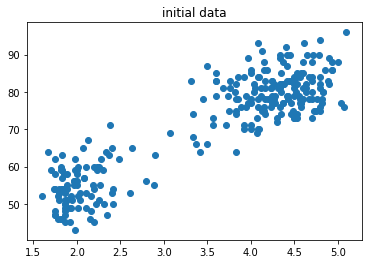

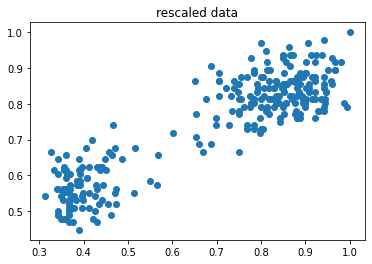

In [ ]:
eruptions = text_list.T[1]
wait_time = text_list.T[2]
plt.scatter(eruptions,wait_time)
plt.title('initial data')
plt.show()

plt.scatter(x_train_ofg[:,0],x_train_ofg[:,1])
plt.title('rescaled data')
plt.show()

# Code for plotting covariance ellipse around data
source: https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Implementing clustering for Old Faithful Geyser data

In [ ]:
def log_prob_k(x,mu):
  return x @ np.log(mu+1e-10) + (1-x) @np.log(1-mu+1e-10)

def p_x_of_theta(x,pi,mu):
  return p_k @ pi

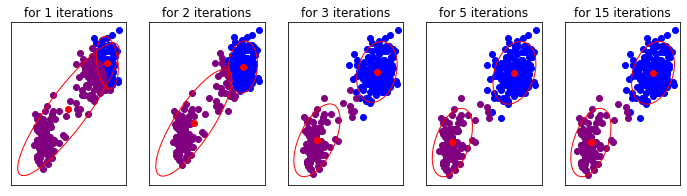

In [ ]:
np.random.seed(4)

# get number of patterns and their dimension, as well as number of clusters:
P,d = x_train_ofg.shape
k = 2 # clusters

# initialize random mu_jk and pi_k
krange = np.arange(k)
muk = np.random.rand(d,k)
muk_start = muk
# pik = np.ones(k)/k
pik = np.random.rand(k)
pik = pik/sum(pik)
iters = [1,2,3,5,15]

fig,ax = plt.subplots(1,len(iters),figsize=(12,3))

for idxs, iters in enumerate(iters):
  muk = muk_start
  # algorithm:
  runs = iters
  counter = 0

  for t in range(runs):
    counter += 1
    # calculate matrix of probabilities for patterns
    prob_all = log_prob_k(x_train_ofg,muk)

    # select k cluster with highest probability
    best_k = np.argmax(prob_all,axis=1)
    # print(np.unique(best_k))

    # initialize arrays for different values:
    N_k = np.zeros(k) # number of patterns in each cluster
    clusters = np.empty((k, 0)).tolist() # matrices of patterns belonging to the cluster
    cov_mat_list = np.empty((k, 0)).tolist() # covariance of the cluster
    mujk = np.empty((k, 0)).tolist() # mean value for each dimension for each cluster

    for i in krange:
      N_k[i] = sum(best_k == i)
      
      clusters[i].append(x_train_ofg[best_k == i])
      clusters[i] = clusters[i][0]
      
      mujk[i] = np.sum(clusters[i],axis=0)/N_k[i]

  # set new pi_k and mu_jk and re-do algorithm
    pik = np.array(N_k/P)
    muk = np.array(mujk).T

  x_data = text_list[:,1:3]
  x_train_ofg = x_data/[max(x_data[:,0]),max(x_data[:,1])]
  ax[idxs].scatter(clusters[0][:,0],clusters[0][:,1],c='blue')
  ax[idxs].scatter(clusters[1][:,0],clusters[1][:,1],c='purple')
  ax[idxs].scatter(muk[0],muk[1],c='red')

  # adding confidence ellipse
  confidence_ellipse(clusters[0][:,0],clusters[0][:,1],ax[idxs],n_std=2,edgecolor='red')
  confidence_ellipse(clusters[1][:,0],clusters[1][:,1],ax[idxs],n_std=2,edgecolor='red')
  ax[idxs].set_title('for {} iterations'.format(iters))
  ax[idxs].set_xticks([])
  ax[idxs].set_yticks([])
plt.show()

